# MODEL 2: SUPPORT VECTOR MACHINES
Omar Ebrahim & Kareem Eltouny

STEP 1: Importing the libraries.

In [1]:
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

STEP 2: Importing the dataset & splitting them to training and testing.

In [2]:
fashionTrain = pd.read_csv("fashion-mnist_train.csv")
fashionTest = pd.read_csv("fashion-mnist_test.csv")
# The splitting was done without a library instead of using the train test split function.
# This is due to us reading from 2 separate CSV files.
X_train = fashionTrain.iloc[:, 1:]
y_train = fashionTrain.iloc[:, 0]
X_test = fashionTest.iloc[:, 1:]
y_test = fashionTest.iloc[:, 0]

STEP 3: Pre-Processing Part 1: Normalization 

In [3]:
# float32 is used to transform the pixel into a 32 bit number, which is of single precision and cuts the memory down in half.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Rescaling them to 0's and 1's.
X_train /= 255.0
X_test /=255.0

STEP 4: Pre-Processing Part 2: PCA

In [23]:
#Number of features before performing PCA 
X_train.shape

(60000, 784)

In [15]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transfom(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
#Number of features after performing PCA
X_train_pca.shape

(60000, 459)

STEP 5: Cross Validation to find the best hyperparameters

In [16]:
param_grid={'C':[0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001],
            'kernel':['rbf']}
SVM_Model=SVC()
rf_Grid= RandomizedSearchCV(estimator=SVM_Model,param_distributions=param_grid,cv=3)
rf_Grid.fit(X_test,y_test)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']})

Displaying the best paramaters

In [11]:
rf_Grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

STEP 6: Training the SVM Model.

In [12]:
start = time.time()
svm_rbf = SVC(C=100, kernel='rbf', gamma=0.01).fit(X_train_pca, y_train)
y_train2 = svm_rbf.predict(X_train_pca)
y_predict = svm_rbf.predict(X_test_pca)     
end = time.time()

STEP 7: Get the accuracies and F1 score.

In [17]:
TrainingAccuracy = accuracy_score(y_train, y_train2)
TestingAccuracy = accuracy_score(y_test, y_predict)
f1Test = f1_score(y_test, y_predict, average='weighted')
Classfication = classification_report(y_test, y_predict)
timeScore = (start - end)*(-1)

Scores = pd.DataFrame({
    'Accuracy_Test': [TestingAccuracy],
    'Accuracy_Train': [TrainingAccuracy],
    'F1_Score_Test': [f1Test],
    'Time_Score': [timeScore]
})
Scores

,Accuracy_Test,Accuracy_Train,F1_Score_Test,Time_Score
0,0.9054,0.98205,0.905025,275.271613


In [ ]:
print(Classfication)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.86      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.72      0.75      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



STEP 8: Visualizing using the Confusion Matrix.

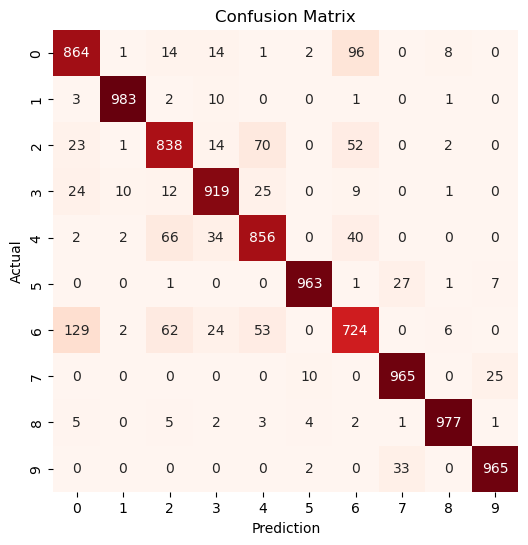

In [19]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()